# Import Library

In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.transforms as mtransforms
import datetime
import math

# Fred Data

In [2]:
def gather_data(data_codes, start, 
                end = datetime.datetime.today(), freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [5]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
               
# Select start and end dates
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
fed_data = gather_data(data_codes = data_codes, start = start, 
                   end = end, freq = "M")

In [6]:
fed_data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: Deposits from Dep. Institutions ($ Mil),Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil)
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-31,601900.0,594.67875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.40850,NaN,5.500000,NaN,5.448387,NaN,72445.0,39.064
2000-02-29,578000.0,566.14375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.24300,NaN,5.741379,NaN,5.734828,NaN,69823.5,37.022
2000-03-31,577100.0,563.70500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.20940,NaN,5.838710,NaN,5.853548,NaN,49108.4,33.233
2000-04-30,578600.0,564.73350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.26750,NaN,6.000000,NaN,6.019667,NaN,46876.0,33.508
2000-05-31,580600.0,565.83560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.25060,NaN,6.258065,NaN,6.268065,NaN,44636.4,33.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,6027000.0,2178.84320,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.0,516.0,...,3789613.40,767312.40,332.96560,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN
2021-07-31,6130200.0,2186.11750,8190356.75,8042917.00,7617340.75,5232755.50,2347.0,2382238.75,0.0,487.0,...,3944127.75,633925.00,243.89825,4831987.25,NaN,0.25,0.098065,0.150000,NaN,NaN
2021-08-31,6328700.0,2187.61075,8291893.25,8153497.75,7733453.75,5312788.25,2347.0,2418318.75,0.0,446.0,...,4134706.50,366867.25,247.10875,4744682.50,NaN,0.25,0.092258,NaN,NaN,NaN


# Load Data

In [51]:
data=pd.read_csv("data 1.csv")

In [52]:
data

,Date,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price,Unemployment Rate
0,1/31/2000,594.68,0.00,5.45,1394.46,0.000000,0.000000,7.240263,4.1
1,2/29/2000,566.14,0.00,5.73,1366.42,0.000000,0.000000,7.219949,4.0
2,3/31/2000,563.71,0.00,5.85,1498.58,0.000000,0.000000,7.312273,3.8
3,4/30/2000,564.73,0.00,6.02,1452.43,0.000000,1.000000,7.280993,4.0
4,5/31/2000,565.84,0.00,6.27,1420.60,0.000000,0.000000,7.258835,4.0
...,...,...,...,...,...,...,...,...,...
257,6/30/2021,2178.84,8026555.20,0.08,4297.50,15.898266,0.000271,8.365789,5.4
258,7/31/2021,2186.13,8190356.75,0.10,4395.26,15.918468,0.000267,8.388282,5.2
259,8/31/2021,2187.63,8291893.25,0.09,4522.68,15.930789,0.000264,8.416860,4.8
260,9/30/2021,2194.90,8418612.40,0.08,4307.54,15.945956,0.000261,8.368122,4.6


In [53]:
data.dtypes

Date                                      object
Base: Currency in Circulation ($ Mil)    float64
Balance Sheet: Total Assets ($ Mil)      float64
Effective Federal Funds Rate             float64
Adj Close                                float64
Log Total Asset                          float64
Currency in Circulation/Total Asset      float64
Log Stock Price                          float64
Unemployment Rate                        float64
dtype: object

In [54]:
data = data.set_index('Date')

In [55]:
data

,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price,Unemployment Rate
Date,,,,,,,,
1/31/2000,594.68,0.00,5.45,1394.46,0.000000,0.000000,7.240263,4.1
2/29/2000,566.14,0.00,5.73,1366.42,0.000000,0.000000,7.219949,4.0
3/31/2000,563.71,0.00,5.85,1498.58,0.000000,0.000000,7.312273,3.8
4/30/2000,564.73,0.00,6.02,1452.43,0.000000,1.000000,7.280993,4.0
5/31/2000,565.84,0.00,6.27,1420.60,0.000000,0.000000,7.258835,4.0
...,...,...,...,...,...,...,...,...
6/30/2021,2178.84,8026555.20,0.08,4297.50,15.898266,0.000271,8.365789,5.4
7/31/2021,2186.13,8190356.75,0.10,4395.26,15.918468,0.000267,8.388282,5.2
8/31/2021,2187.63,8291893.25,0.09,4522.68,15.930789,0.000264,8.416860,4.8


In [56]:
data_new = data.drop(['Base: Currency in Circulation ($ Mil)', 'Balance Sheet: Total Assets ($ Mil)', 'Adj Close'], axis=1)

In [57]:
data_new

,Effective Federal Funds Rate,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price,Unemployment Rate
Date,,,,,
1/31/2000,5.45,0.000000,0.000000,7.240263,4.1
2/29/2000,5.73,0.000000,0.000000,7.219949,4.0
3/31/2000,5.85,0.000000,0.000000,7.312273,3.8
4/30/2000,6.02,0.000000,1.000000,7.280993,4.0
5/31/2000,6.27,0.000000,0.000000,7.258835,4.0
...,...,...,...,...,...
6/30/2021,0.08,15.898266,0.000271,8.365789,5.4
7/31/2021,0.10,15.918468,0.000267,8.388282,5.2
8/31/2021,0.09,15.930789,0.000264,8.416860,4.8


In [58]:
data_new = data_new.loc['1/31/2009':'10/31/2021']

In [59]:
data_new

,Effective Federal Funds Rate,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price,Unemployment Rate
Date,,,,,
1/31/2009,0.15,14.525435,0.000436,6.716449,8.3
2/28/2009,0.22,14.447648,0.000475,6.599993,8.7
3/31/2009,0.18,14.501045,0.000454,6.681946,9.0
4/30/2009,0.15,14.568579,0.000425,6.771718,9.4
5/31/2009,0.18,14.573726,0.000424,6.823438,9.5
...,...,...,...,...,...
6/30/2021,0.08,15.898266,0.000271,8.365789,5.4
7/31/2021,0.10,15.918468,0.000267,8.388282,5.2
8/31/2021,0.09,15.930789,0.000264,8.416860,4.8


In [71]:
data_new.columns

Index(['Effective Federal Funds Rate', 'Log Total Asset',
       'Currency in Circulation/Total Asset', 'Log Stock Price',
       'Unemployment Rate'],
      dtype='object')

In [61]:
data_new.diff()

,Effective Federal Funds Rate,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price,Unemployment Rate
Date,,,,,
1/31/2009,NaN,NaN,NaN,NaN,NaN
2/28/2009,0.07,-0.077786,0.000039,-0.116457,0.4
3/31/2009,-0.04,0.053397,-0.000021,0.081953,0.3
4/30/2009,-0.03,0.067534,-0.000028,0.089772,0.4
5/31/2009,0.03,0.005147,-0.000001,0.051721,0.1
...,...,...,...,...,...
6/30/2021,0.02,0.020092,-0.000004,0.021971,-0.5
7/31/2021,0.02,0.020202,-0.000005,0.022493,-0.2
8/31/2021,-0.01,0.012321,-0.000003,0.028578,-0.4


In [62]:
data_stock =  data_new.diff()

In [63]:
data_stock

,Effective Federal Funds Rate,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price,Unemployment Rate
Date,,,,,
1/31/2009,NaN,NaN,NaN,NaN,NaN
2/28/2009,0.07,-0.077786,0.000039,-0.116457,0.4
3/31/2009,-0.04,0.053397,-0.000021,0.081953,0.3
4/30/2009,-0.03,0.067534,-0.000028,0.089772,0.4
5/31/2009,0.03,0.005147,-0.000001,0.051721,0.1
...,...,...,...,...,...
6/30/2021,0.02,0.020092,-0.000004,0.021971,-0.5
7/31/2021,0.02,0.020202,-0.000005,0.022493,-0.2
8/31/2021,-0.01,0.012321,-0.000003,0.028578,-0.4


In [64]:
data_updated = data_stock.dropna()

In [65]:
data_updated

,Effective Federal Funds Rate,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price,Unemployment Rate
Date,,,,,
2/28/2009,0.07,-0.077786,0.000039,-0.116457,0.4
3/31/2009,-0.04,0.053397,-0.000021,0.081953,0.3
4/30/2009,-0.03,0.067534,-0.000028,0.089772,0.4
5/31/2009,0.03,0.005147,-0.000001,0.051721,0.1
6/30/2009,0.03,-0.036956,0.000017,0.000196,0.0
...,...,...,...,...,...
6/30/2021,0.02,0.020092,-0.000004,0.021971,-0.5
7/31/2021,0.02,0.020202,-0.000005,0.022493,-0.2
8/31/2021,-0.01,0.012321,-0.000003,0.028578,-0.4


In [70]:
data_updated.isnull().sum()

index                                  0
Date                                   0
Effective Federal Funds Rate           0
Log Total Asset                        0
Currency in Circulation/Total Asset    0
Log Stock Price                        0
Unemployment Rate                      0
dtype: int64

In [91]:
data_graph = pd.read_csv("data 3.csv")

In [92]:
data_graph 

,Date,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price,Unemployment Rate
0,2008-10-31,849.12,1727614.60,0.97,968.75,14.362252,0.000491,6.876007,6.8
1,2009-10-31,915.32,2173382.25,0.12,1036.19,14.591795,0.000421,6.943306,9.9
2,2010-10-31,960.37,2304649.00,0.19,1183.26,14.650439,0.000417,7.076029,9.8
3,2011-10-31,1042.13,2854649.50,0.07,1253.30,14.864460,0.000365,7.133535,8.6
4,2012-10-31,1134.62,2826231.20,0.16,1412.16,14.854455,0.000401,7.252876,7.7
5,2013-10-31,1213.42,3800415.60,0.09,1756.54,15.150621,0.000319,7.471101,6.9
6,2014-10-31,1294.04,4469678.60,0.09,2018.05,15.312827,0.000290,7.609887,5.8
7,2015-10-31,1391.43,4495400.00,0.12,2079.36,15.318565,0.000310,7.639815,5.1
8,2016-10-31,1475.81,4459703.25,0.40,2126.15,15.310593,0.000331,7.662068,4.7
9,2017-10-31,1583.26,4462669.25,1.15,2575.26,15.311258,0.000355,7.853706,4.2


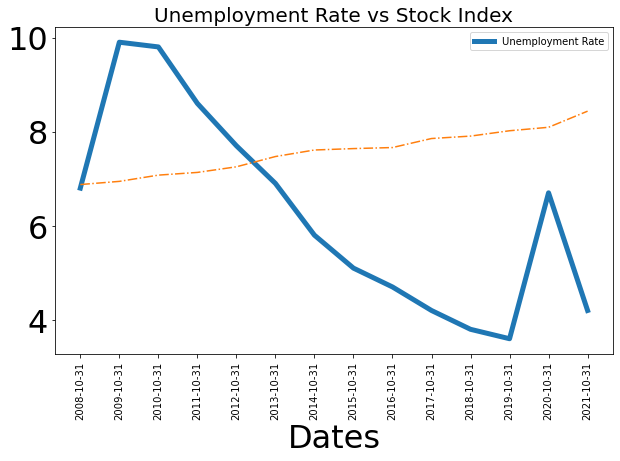

<Figure size 432x288 with 0 Axes>

In [135]:
plt.figure(figsize=(10,6))
plt.plot(data_graph["Unemployment Rate"], label="Unemployment Rate", linewidth=5.)
plt.plot(data_graph["Log Stock Price"], linestyle = "-.")
plt.xticks(range(0,len(data_graph["Unemployment Rate"])), data_graph["Date"], rotation = 90, fontsize = 10)
plt.title("Unemployment Rate vs Stock Index", fontsize = 20)
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("Dates")
plt.show()
plt.savefig("Unemployment Rate vs Stock Index.jpg")

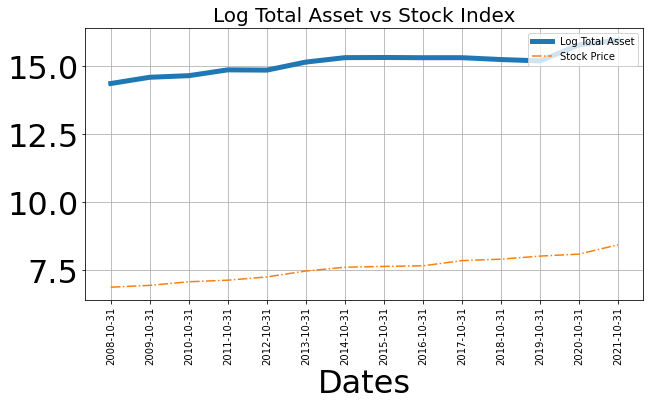

<Figure size 432x288 with 0 Axes>

In [137]:
plt.figure(figsize=(10,5))
plt.plot(data_graph["Log Total Asset"], label="Log Total Asset", linewidth=5.)
plt.plot(data_graph["Log Stock Price"],label="Stock Price", linestyle = "-.")
plt.xticks(range(0,len(data_graph["Log Total Asset"])), data_graph["Date"], rotation = 90, fontsize = 10)
plt.title("Log Total Asset vs Stock Index", fontsize = 20)
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("Dates")
plt.grid(True)
plt.show()
plt.savefig("TA vs Stock Index.jpg")

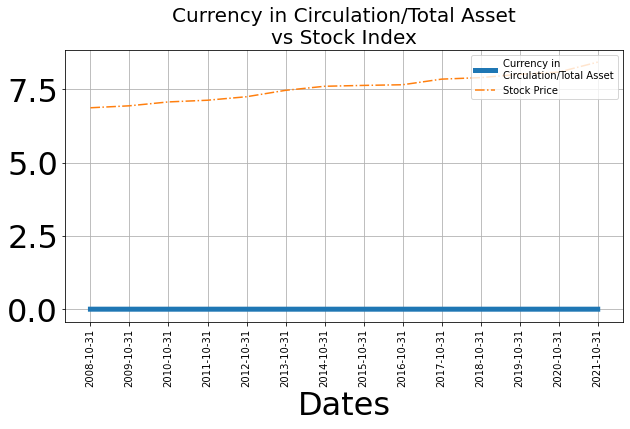

<Figure size 432x288 with 0 Axes>

In [138]:
plt.figure(figsize=(10,5))
plt.plot(data_graph["Currency in Circulation/Total Asset"], label="Currency in\nCirculation/Total Asset", linewidth=5.)
plt.plot(data_graph["Log Stock Price"],label="Stock Price", linestyle = "-.")
plt.xticks(range(0,len(data_graph["Currency in Circulation/Total Asset"])), data_graph["Date"], rotation = 90, fontsize = 10)
plt.title("Currency in Circulation/Total Asset\nvs Stock Index", fontsize = 20)
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("Dates")
plt.grid(True)
plt.show()
plt.savefig("CA vs Stock Index.jpg")

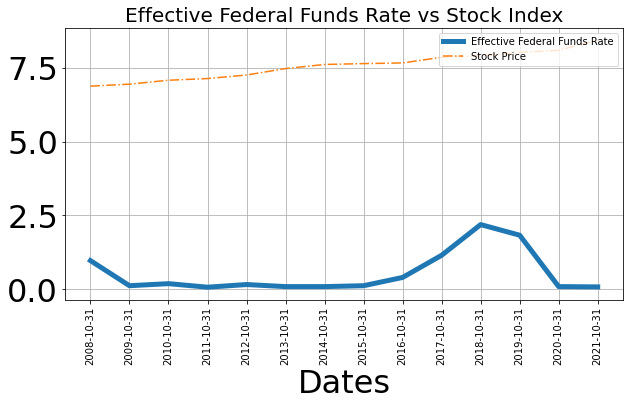

<Figure size 432x288 with 0 Axes>

In [139]:
plt.figure(figsize=(10,5))
plt.plot(data_graph["Effective Federal Funds Rate"], label="Effective Federal Funds Rate", linewidth=5.)
plt.plot(data_graph["Log Stock Price"],label="Stock Price", linestyle = "-.")
plt.xticks(range(0,len(data_graph["Effective Federal Funds Rate"])), data_graph["Date"], rotation = 90, fontsize = 10)
plt.title("Effective Federal Funds Rate vs Stock Index", fontsize = 20)
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("Dates")
plt.grid(True)
plt.show()
plt.savefig("FFR vs Stock Index.jpg")

In [ ]:
data_final = data_updated.drop(['Base: Currency in Circulation ($ Mil)', 'Balance Sheet: Total Assets ($ Mil)', 'Adj Close'], axis=1)

In [140]:
# get the summary
desc_df = data_updated.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,level_0,index,Effective Federal Funds Rate,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price,Unemployment Rate
count,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000
mean,76.000000,76.000000,-0.000458,0.009360,-1.157529e-06,0.011232,-0.026797
std,44.311398,44.311398,0.107375,0.031180,1.068846e-05,0.041633,0.908440
min,0.000000,0.000000,-0.930000,-0.077786,-9.568000e-05,-0.133668,-2.200000
25%,38.000000,38.000000,-0.010000,-0.001927,-3.443000e-06,-0.007526,-0.200000
50%,76.000000,76.000000,0.000000,0.002383,8.780000e-07,0.017726,-0.100000
75%,114.000000,114.000000,0.010000,0.016727,3.022000e-06,0.035100,0.100000
max,152.000000,152.000000,0.240000,0.310113,3.948700e-05,0.119421,10.400000
+3_std,208.934194,208.934194,0.321668,0.102900,3.090786e-05,0.136132,2.698524
-3_std,-56.934194,-56.934194,-0.322583,-0.084180,-3.322292e-05,-0.113667,-2.752119


# Build Model

In [141]:
X = data_updated.drop('Log Stock Price', axis = 1)
Y = data_updated[['Log Stock Price']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


regression_model = LinearRegression()


regression_model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

ValueError: could not convert string to float: '9/30/2010'

# Exploring the Output

In [ ]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

# Evaluating the Model

In [ ]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [ ]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

In [ ]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

## Checking for Heteroscedasticity

In [ ]:
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

# Checking for Autocorrelation

In [ ]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

### OLS

In [ ]:
y_var = ["Log Stock Price"]
x_vars = ["Log Total Asset",
         "Currency in Circulation/Total Asset",
         "Effective Federal Funds Rate",
         "Unemployment Rate"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars].dropna()
reg_data

In [ ]:
reg_data.corr()

In [ ]:
from datlib.plots import *
corr_matrix_heatmap(reg_data.corr())

In [ ]:
reg_data.describe().round(2)

In [ ]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"]=1
results = sm.OLS(y,X).fit()
results.summary()

In [ ]:
est.pvalues

In [ ]:
keys = ['Log Total Asset',
         'Currency in Circulation/Total Asset',
         'Effective Federal Funds Rate',
         'Unemployment Rate',
         'Log Stock Price']

keys = keys
reg_data = data_updated[keys].dropna()

In [ ]:
reg_data

In [ ]:
keys = ['Log Total Asset',
         'Currency in Circulation/Total Asset',
         'Effective Federal Funds Rate',
         'Unemployment Rate',
         'Log Stock Price']

keys = keys
reg_data = data_updated[keys].dropna()

In [ ]:
reg_data

## Residuals

In [ ]:
import statsmodels.api as sm

residuals = {}
for y_var in reg_data.keys():
    X_vars = list(reg_data.keys())
    X_vars.remove(y_var)
    X = reg_data[X_vars]
    # Initial estimate should include constant
    #   This won't be the case we regress the errors
    X["Constant"] = 1
    # pass y_var as list for consistent structure
    y = reg_data[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

In [ ]:
residuals

In [ ]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

In [ ]:
pcorr_pvalues = {}
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            pcorr_pvalues[y][x] = sm.OLS(Y,X).fit().pvalues[x]
        
        else:
            pcorr_pvalues[y][x] = np.NaN
pd.DataFrame(pcorr_pvalues).round(2)

In [ ]:
import pingouin
from pgmpy.estimators import PC
c = PC(reg_data[keys].dropna())
max_cond_vars = len(keys) - 2

sig = 0.5
model = c.estimate(return_type = "dag", variant = "parallel",
                  significance_level = sig,
                  max_cond_vars = max_cond_vars, ci_test = "pearsonr")

edges = model.edges()
pcorr = reg_data.pcorr()
weights = {}

In [ ]:
from datlib.plots import *
corr_matrix_heatmap(data_updated.corr(), 
                    save_fig = False, 
                    pp = None, 
                    title = "Correlation")
corr_matrix_heatmap(data_updated.pcorr(), save_fig = False, pp = None, title = "Partial Correlation")

## Using partial correlations to build a causal skeleton

In [ ]:
undirected_graph = {key:[] for key in reg_data.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in reg_data.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph

In [ ]:
undirected_graph = {key:[] for key in reg_data.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in reg_data.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph 

In [ ]:
import copy
p_val = .01
def build_skeleton(reg_data, undirected_graph):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:

                c_used.append(c_var)
                test = reg_data.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    #breakout of the for 
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
                
    for x in reg_data.keys():
        ys = undirected_graph[x]
        for y in reg_data.keys():
            if x != y:
            # first check for correlation with no controls
                test = reg_data.partial_corr(x = x, 
                                       y = y, 
                                       covar = None,
                                       method = "pearson") 
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
            # if correlated check for deseparation controlling for other variables
                else:
                    control_vars = [z for z in reg_data.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(reg_data, undirected_graph)                                   
undirected_graph

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG(undirected_graph, reg_data, title = "DAG Structure"):
    
    # generate partial correlation matrix to draw values from
    # for graph edges
    pcorr_matrix = reg_data.pcorr()
    graph = nx.Graph()
    edges = [['Effective Federal Funds Rate', 'Log Stock Price'], ['Log Stock Price', 'Log Total Asset'], ['Log Stock Price', 'Unemployment Rate'], ['Log Stock Price', 'Currency in Circulation/Total Asset']]
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)
                # edge label is partial correlation between
                # key and key2
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2],2))

    # edge format: ("i", "j") --> from node i to node j
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 1000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
    plt.show()

In [ ]:
graph_DAG(undirected_graph, reg_data, title = "Undirected Graph with Partial Correlations\nfrom Full Set of Controls")

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
import pingouin
from pgmpy.estimators import PC
c = PC(reg_data[keys].dropna())
max_cond_vars = len(keys) - 2

sig = 0.5
model = c.estimate(return_type = "dag", variant = "parallel",
                  significance_level = sig,
                  max_cond_vars = max_cond_vars, ci_test = "pearsonr")

edges = [['Effective Federal Funds Rate', 'Log Stock Price'], ['Log Stock Price', 'Log Total Asset'], ['Log Stock Price', 'Unemployment Rate'], ['Log Stock Price', 'Currency in Circulation/Total Asset']]
G = nx.Graph()

edges = model.edges()
pcorr = reg_data.pcorr()
weights = {}

In [ ]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, reg_data, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "white",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, reg_data, title = "Directed Acyclic Graph")
edges

In [ ]:
from pgmpy.estimators import PC
c = PC(reg_data)
max_cond_vars = len(reg_data.keys()) - 2


model = c.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()

In [ ]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, reg_data, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "white",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, reg_data, title = "Directed Acyclic Graph")
edges

In [ ]:
def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    edge_labels = {}
    ############ Add ############
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)                
        print(edge, keep_controls)
        pcorr = reg_data[[edge[0], edge[1]]+keep_controls].pcorr()
#         corr_matrix_heatmap(pcorr, save_fig = False, pp = None, title = "Partial Correlation")
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     # turn text black for larger variable names in homework
                     font_color = "k",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    ############ Add ############
    nx.draw_networkx_edge_labels(graph,pos,
                                edge_labels=edge_labels,
                                font_color='green',
                                font_size=20)

graph_DAG(edges, reg_data, title = "Directed Acyclic Graph")

In [ ]:
here "Log stock price" is my dependent variable (Y)